# Logistic Regression -  Mushroom Data

In [2]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import precision_recall_fscore_support

import numpy as np
import math
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Reading the data

In [3]:
# Read the csv into dataframe
df_raw = pd.read_csv('mushrooms.csv', engine='python')
df_raw.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Since the data is not numeric, transform the data to numerical values
df = df_raw
for col in df_raw.columns:
    df[col] = LabelEncoder().fit_transform(df_raw[col])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [5]:
print(df.corr())
# We see that veil-type is not related to any other column, so we disregard this feature
df.drop('veil-type', axis=1, inplace=True)

                             class  cap-shape  cap-surface  cap-color  \
class                     1.000000   0.052951     0.178446  -0.031384   
cap-shape                 0.052951   1.000000    -0.050454  -0.048203   
cap-surface               0.178446  -0.050454     1.000000  -0.019402   
cap-color                -0.031384  -0.048203    -0.019402   1.000000   
bruises                  -0.501530  -0.035374     0.070228  -0.000764   
odor                     -0.093552  -0.021935     0.045233  -0.387121   
gill-attachment           0.129200   0.078865    -0.034180   0.041436   
gill-spacing             -0.348387   0.013196    -0.282306   0.144259   
gill-size                 0.540024   0.054050     0.208100  -0.169464   
gill-color               -0.530566  -0.006039    -0.161017   0.084659   
stalk-shape              -0.102019   0.063794    -0.014123  -0.456496   
stalk-root               -0.379361   0.030191    -0.126245   0.321274   
stalk-surface-above-ring -0.334593  -0.030417     0

In [6]:
# Get the feature and output
y = np.array(df.iloc[:,0])
x = np.array(df.iloc[:, 1:])

##  Data Pre-Processing
Scale before splitting the data into train and test- scale the data since we will be using gradient ascent

In [7]:
# Split the data into traning and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print(x_train)

[[5 2 8 ... 2 0 1]
 [2 0 2 ... 3 5 0]
 [5 3 4 ... 7 4 0]
 ...
 [2 0 8 ... 2 3 1]
 [5 0 3 ... 1 4 1]
 [5 3 3 ... 2 5 0]]


## Logistic Regression without regularization

In [8]:
def logreg_model(x_train, y_train, x_test, y_test):
    # Fitting the model
    logreg = LogisticRegression(penalty='none', max_iter=10000)
    logreg.fit(x_train, y_train)
    w = logreg.coef_
    
    # Getting the metrics for traning data
    yhat_train = logreg.predict(x_train)
    acc_train_logreg = np.mean(yhat_train == y_train)
    
    # Getting the metrics for test data
    yhat_test = logreg.predict(x_test)
    acc_test_logreg = np.mean(yhat_test == y_test)

    return acc_train_logreg, acc_test_logreg, w

In [42]:
acc_train_logreg, acc_test_logreg, w_logreg = logreg_model(x_train, y_train, x_test, y_test)

print("Accuracy of training data: ", acc_train_logreg)
print("Accuracy of test data: ", acc_test_logreg)

# Note: C value does not affect the output as there is no regularization

Accuracy of training data:  0.9688166748728049
Accuracy of test data:  0.9739044805514525


## Logistic Regression using L1 regularization

In [10]:
def logreg_model_l1(c , x_train, y_train, x_test, y_test, train_acc, test_acc):
    # Fitting the model
    logreg = LogisticRegression(C=c, penalty='l1', solver='saga', max_iter=10000)
    logreg.fit(x_train, y_train)
    w = logreg.coef_
    
    # Getting the metrics for traning data
    yhat_train = logreg.predict(x_train)
    acc_train = np.mean(yhat_train == y_train)
    train_acc.append(acc_train)
    
    # Getting the metrics for test data
    yhat_test = logreg.predict(x_test)
    acc_test = np.mean(yhat_test == y_test)
    test_acc.append(acc_test)
    
    return w

In [43]:
acc_train_logreg_l1 = [] 
acc_test_logreg_l1 = []

cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
for c in cVals:
    w_logreg_l1 = logreg_model_l1(c, x_train, y_train, x_test, y_test, acc_train_logreg_l1, acc_test_logreg_l1)

print("Accuracy of training data: ", acc_train_logreg_l1)
print("Accuracy of test data: ", acc_test_logreg_l1)

Accuracy of training data:  [0.5128836369604464, 0.7528311176760216, 0.913835548990645, 0.9448547513540128, 0.9584769407516822, 0.9675036927621861, 0.9671754472345314, 0.9671754472345314, 0.9671754472345314, 0.9671754472345314]
Accuracy of test data:  [0.5332348596750369, 0.7646479566715904, 0.9217134416543574, 0.9542097488921714, 0.9640571147218119, 0.9709502708025604, 0.9709502708025604, 0.9709502708025604, 0.9709502708025604, 0.9709502708025604]


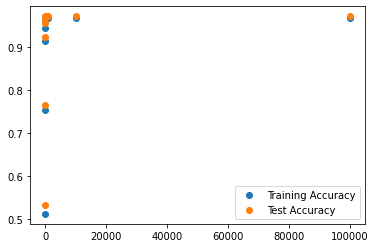

In [12]:
plt.scatter(cVals, acc_train_logreg_l1)
plt.grid()

plt.scatter(cVals, acc_test_logreg_l1)
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

## Logistic Regression using L2 regularization

In [13]:

def logreg_model_l2(c , x_train, y_train, x_test, y_test, train_acc, test_acc):
    # Fitting the model
    logreg = LogisticRegression(C=c, penalty='l2', solver='saga', max_iter=10000)
    logreg.fit(x_train, y_train)
    w = logreg.coef_
    
    # Getting the metrics for traning data
    yhat_train = logreg.predict(x_train)
    acc_train = np.mean(yhat_train == y_train)
    train_acc.append(acc_train)
    
    # Getting the metrics for test data
    yhat_test = logreg.predict(x_test)
    acc_test = np.mean(yhat_test == y_test)
    test_acc.append(acc_test)
    
    return w

In [44]:
acc_train_logreg_l2 = [] 
acc_test_logreg_l2 = []

cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
for c in cVals:
    w_logreg_l2 = logreg_model_l2(c, x_train, y_train, x_test, y_test, acc_train_logreg_l2, acc_test_logreg_l2)

print("Accuracy of training data: ", acc_train_logreg_l2)
print("Accuracy of test data: ", acc_test_logreg_l2)

Accuracy of training data:  [0.8340718857705564, 0.8775644181848022, 0.908091252256688, 0.9374692269817824, 0.9487936976858691, 0.9574922041687182, 0.967011324470704, 0.9673395699983588, 0.9671754472345314, 0.9671754472345314]
Accuracy of test data:  [0.8453963564746431, 0.8778926637124569, 0.914327917282127, 0.9463318562284588, 0.9556868537666174, 0.9645494830132939, 0.9689807976366323, 0.9709502708025604, 0.9709502708025604, 0.9709502708025604]


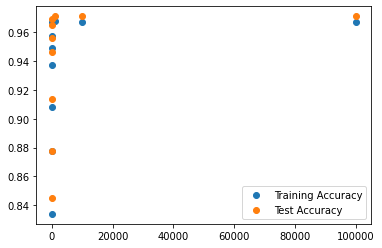

In [15]:
plt.scatter(cVals, acc_train_logreg_l2)
plt.grid()

plt.scatter(cVals, acc_test_logreg_l2)
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

## Logistic Regression with Feature Transformation

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

# Transform the freatures
x_transformed_train = poly.fit_transform(x_train)
x_transformed_test = poly.fit_transform(x_test)

In [18]:
acc_train_logreg_ft, acc_test_logreg_ft, w = logreg_model(x_transformed_train, y_train, x_transformed_test, y_test)

print("Accuracy of training data: ", acc_train_logreg_ft)
print("Accuracy of test data: ", acc_test_logreg_ft)

Accuracy of training data:  1.0
Accuracy of test data:  0.999507631708518


In [19]:
acc_train_logreg_ft_l1 = []
acc_test_logreg_ft_l1 = []

cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
for c in cVals:
    logreg_model_l1(c, x_transformed_train, y_train, x_transformed_test, y_test, acc_train_logreg_ft_l1, acc_test_logreg_ft_l1)

print("Accuracy of training data: ", acc_train_logreg_ft_l1)
print("Accuracy of test data: ", acc_test_logreg_ft_l1)

Accuracy of training data:  [0.794682422451994, 0.9061217790907599, 0.9876907927129492, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Accuracy of test data:  [0.8005908419497785, 0.9153126538650911, 0.9921221073362876, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


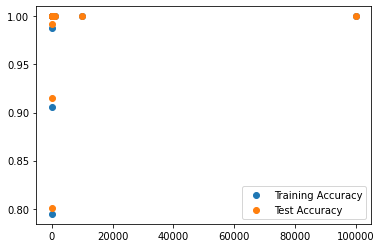

In [20]:
plt.scatter(cVals, acc_train_logreg_ft_l1)
plt.grid()

plt.scatter(cVals, acc_test_logreg_ft_l1)
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [21]:
acc_train_logreg_ft_l2 = []
acc_test_logreg_ft_l2 = []

cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
for c in cVals:
    logreg_model_l2(c, x_transformed_train, y_train, x_transformed_test, y_test, acc_train_logreg_ft_l2, acc_test_logreg_ft_l2)

print("Accuracy of training data: ", acc_train_logreg_ft_l2)
print("Accuracy of test data: ", acc_test_logreg_ft_l2)

Accuracy of training data:  [0.9584769407516822, 0.9909732479894962, 0.9996717544723454, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Accuracy of test data:  [0.9650418513047759, 0.9940915805022157, 0.999507631708518, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


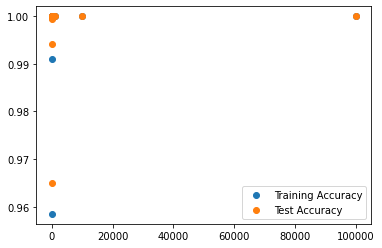

In [22]:
plt.scatter(cVals, acc_train_logreg_ft_l2)
plt.grid()

plt.scatter(cVals, acc_test_logreg_ft_l2)
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

## Results

In [23]:
data = pd.DataFrame(np.array([acc_train_logreg, acc_test_logreg, acc_train_logreg_ft, acc_test_logreg_ft]), index=['Training', 'Test', 'Training FT', 'Test FT'], columns=[''])
data


,
Training,0.968817
Test,0.973904
Training FT,1.000000
Test FT,0.999508


In [24]:
data_regularization = pd.DataFrame(np.array([acc_train_logreg_l1, acc_test_logreg_l1, acc_train_logreg_l2, acc_test_logreg_l2, acc_train_logreg_ft_l1, acc_test_logreg_ft_l1, acc_train_logreg_ft_l2, acc_test_logreg_ft_l2]), index=['Training L1', 'Test L1', 'Training L2', 'Test L2', 'Train FT L1', 'Test FT L1', 'Train FT L2', 'Test FT L2'], columns=cVals)
data_regularization

,0.0001,0.0010,0.0100,0.1000,1.0000,10.0000,100.0000,1000.0000,10000.0000,100000.0000
Training L1,0.512884,0.752831,0.913836,0.944855,0.958477,0.967504,0.967175,0.967175,0.967175,0.967175
Test L1,0.533235,0.764648,0.921713,0.954210,0.964057,0.970950,0.970950,0.970950,0.970950,0.970950
Training L2,0.834072,0.877564,0.908091,0.937469,0.948794,0.957492,0.967011,0.967340,0.967175,0.967175
Test L2,0.845396,0.877893,0.913836,0.946332,0.955687,0.964549,0.968981,0.970950,0.970950,0.970950
Train FT L1,0.794682,0.906122,0.987691,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test FT L1,0.800591,0.915313,0.992122,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Train FT L2,0.958477,0.990973,0.999672,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test FT L2,0.965042,0.994092,0.999508,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
w_logreg = w_logreg[0]
w_logreg_l1 = w_logreg_l1[0]
w_logreg_l2 = w_logreg_l2[0]

In [53]:
w_vals = pd.DataFrame([w_logreg, w_logreg_l1, w_logreg_l2], columns=df.columns[1:], index=['W', 'W L1', 'W L2'])
pd.options.display.max_columns = None
w_vals

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
W,0.031611,0.311524,-0.123230,2.227868,-1.281194,-31.316795,-22.847466,21.094219,-0.194328,-2.116753,-8.769794,-12.766001,0.503333,-0.245796,-0.130253,51.783117,1.737817,4.771023,-0.114219,-1.211860,0.148228
W L1,0.003663,0.341205,-0.096625,1.434921,-1.081052,-22.596863,-18.701721,17.511917,-0.159143,-1.590060,-6.984467,-10.423404,0.328081,-0.216523,-0.104085,35.582033,1.811025,3.705262,-0.175242,-1.048125,0.116777
W L2,0.003634,0.341235,-0.096599,1.434351,-1.080918,-22.591103,-18.698967,17.509524,-0.159118,-1.589697,-6.983274,-10.421865,0.327966,-0.216496,-0.104058,35.575152,1.811039,3.704556,-0.175287,-1.048015,0.116753


<AxesSubplot:>

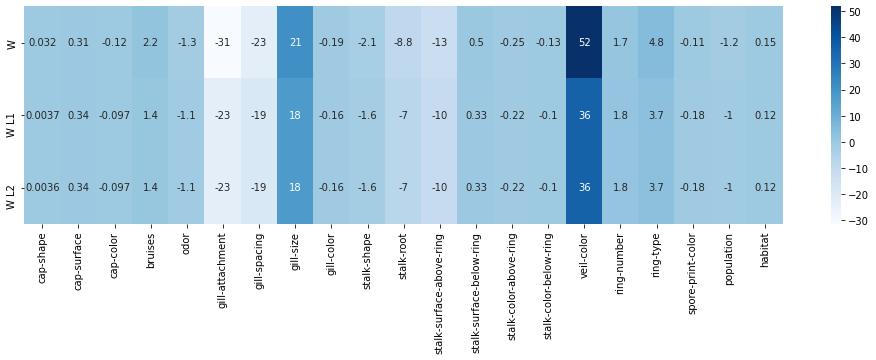

In [64]:
import seaborn as sbn
fig = plt.gcf()
fig.set_size_inches(17, 4)
sbn.heatmap(w_vals,annot=True,cmap=plt.cm.Blues)